In [260]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [261]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [262]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, fbeta_score, accuracy_score

def perfo(y_true, y_pred, beta=1):
    """
    Evaluate the performance of a classification model.
    
    Parameters:
    y_true (list): List of true class labels
    y_pred (list): List of predicted class labels
    beta (float): Weight of recall in the F-beta score

    Returns:
    dict: Dictionary containing performance metrics
    """
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    sensitivity = recall = tp / (tp + fn)  # Sensitivity (Recall)
    specificity = tn / (tn + fp)         # Specificity
    precision = precision_score(y_true, y_pred)  # Precision
    accuracy = accuracy_score(y_true, y_pred)    # Accuracy
    f_beta = fbeta_score(y_true, y_pred, beta=beta)  # F-beta score

    # Compile metrics into a dictionary
    metrics = {
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'Accuracy': accuracy,
        'F-beta Score': f_beta
    }

    return metrics


# 데이터 불러오기

In [263]:
os.getcwd()

'c:\\Users\\Owner\\Desktop\\윤태준\\소\\거비프 데이터-2023\\code'

In [264]:
# data1 = pd.read_excel('../data/거비프 데이터-2020.xlsx')
# data2 = pd.read_excel('../data/거비프 데이터-2021.xlsx')
# data3 = pd.read_excel('../data/거비프 데이터-2022.xlsx')

data4 = pd.read_excel('../data/거비프 데이터-2023.xlsx')

# 탐색

In [265]:
train = pd.read_csv('../data/train.csv', encoding = 'cp949')
train_copy = train.copy()

# 데이터 전처리

## 변수변환 - target 1,2,3 만들기

In [266]:
# target1, 2, 3 만들기
train_copy['target1'] = train_copy['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
train_copy['target2'] = train_copy['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
train_copy['target3'] = train_copy['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [267]:
data4['target1'] = data4['근내환산점수'].apply(lambda x: 1 if 5 == x else 0)
data4['target2'] = data4['근내환산점수'].apply(lambda x: 1 if 4 <= x else 0)
data4['target3'] = data4['근내환산점수'].apply(lambda x: 1 if 3 <= x else 0)

In [268]:
# 확인
print('target1 확인')
print(train_copy['target1'].value_counts())
print(len(train_copy[train_copy['근내환산점수']==5]))
print(('\n'))
print('target2 확인')
print(train_copy['target2'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=4]))
print(('\n'))
print('target3 확인')
print(train_copy['target3'].value_counts())
print(len(train_copy[train_copy['근내환산점수']>=3]))

target1 확인
0    176469
1    101658
Name: target1, dtype: int64
101658


target2 확인
1    188123
0     90004
Name: target2, dtype: int64
188123


target3 확인
1    250515
0     27612
Name: target3, dtype: int64
250515


In [269]:
# 출생산차 binary 만들기
train_copy['산차_binary'] = train_copy['출생산차'].apply(lambda x: 1 if 1 == x else 0)

data4['산차_binary'] = data4['출생산차'].apply(lambda x: 1 if 1 == x else 0)

In [270]:
print(len(train_copy[train_copy['산차_binary']==1]))
print(len(train_copy[train_copy['출생산차']==1]))

print(len(data4[data4['산차_binary']==1]))
print(len(data4[data4['출생산차']==1]))

91891
91891
40629
40629


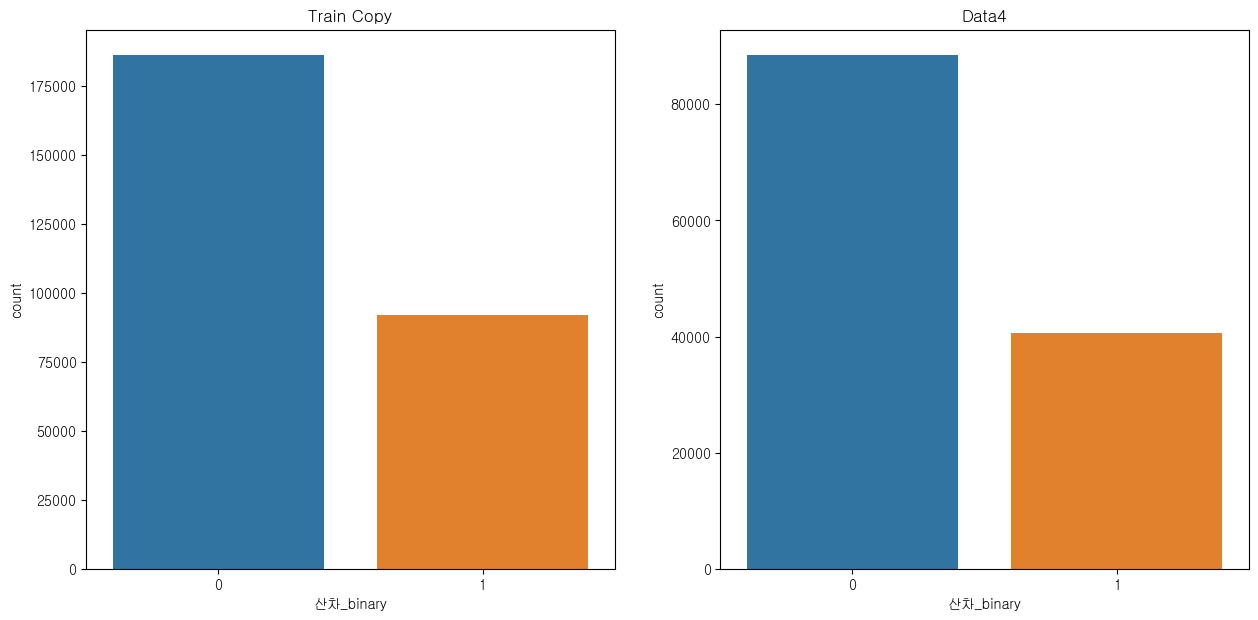

In [271]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='산차_binary', data=train_copy)
plt.title('Train Copy')

plt.subplot(1, 2, 2)
sns.countplot(x='산차_binary', data=data4)
plt.title('Data4')

plt.show()

In [272]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
목장코드,278127.0,302595.856102,142271.505433,1571.0000,150143.0000,344435.0000,434577.0000,706145.0000
도축개월령,278127.0,30.322115,2.553793,7.0000,29.0000,30.0000,32.0000,138.0000
생시체중,278127.0,813.180090,104.318297,134.0000,752.0000,814.0000,879.0000,2189.0000
출생산차,278127.0,3.343915,342.134740,1.0000,1.0000,2.0000,3.0000,180425.0000
EPD 근내,278127.0,0.395224,0.404278,-1.1338,0.1110,0.3704,0.6119,1.6087
EPD 냉도체중,278127.0,12.342964,10.084379,-18.4743,4.6455,13.3421,18.0989,58.3984
KPN체고,278127.0,131.392727,2.736552,0.0000,129.7000,131.4000,133.3000,138.8000
KPN체장,278127.0,151.772937,5.378027,0.0000,147.7000,152.2000,156.4000,164.2000
실제 도축 도체중,278127.0,455.360947,58.418637,75.0000,421.0000,456.0000,492.0000,1226.0000
실제 도축 근내지방,278127.0,6.077263,1.960400,0.0000,5.0000,6.0000,8.0000,9.0000


In [273]:
len(train_copy[train_copy['농가근내평균가산점수']==0])/len(train_copy)

0.42219561567197716

## 모델링

In [274]:
train_2 = train_copy[(train_copy['출생산차']!=180425)|(train_copy['출생산차']!=1181)|(train_copy['출생산차']!=970)|(train_copy['출생산차']!=969)].copy()
train_2 = train_2.rename(columns=lambda x: x.replace(' ', ''))
train_2.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3', '산차_binary'],
      dtype='object')

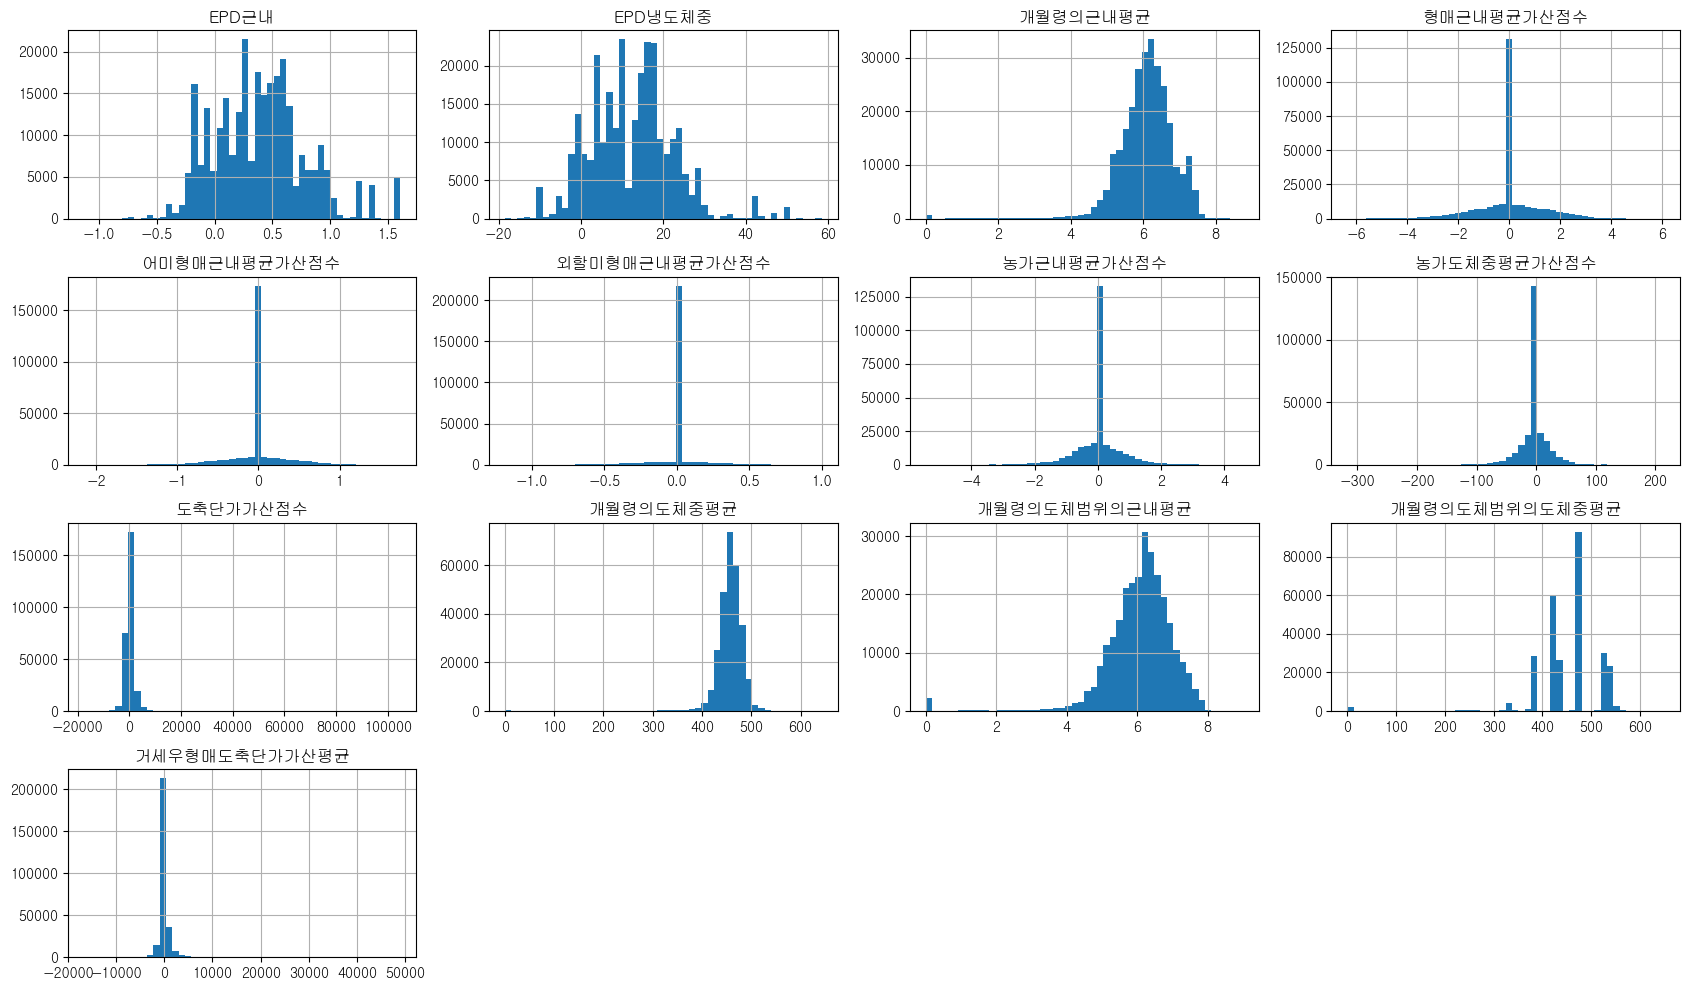

In [275]:
train_2[['EPD근내', 'EPD냉도체중', '개월령의근내평균', '형매근내평균가산점수',
            '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
            '농가도체중평균가산점수', '도축단가가산점수', '개월령의도체중평균', '개월령의도체범위의근내평균',
            '개월령의도체범위의도체중평균', '거세우형매도축단가가산평균']].hist(figsize=(17, 10), bins=50)
plt.tight_layout()
plt.show()

In [276]:
print("1",len(train_2[train_2['형매근내평균가산점수']==0])/len(train_2))
print("2",len(train_2[train_2['농가근내평균가산점수']==0])/len(train_2))
print("3",len(train_2[train_2['농가도체중평균가산점수']==0])/len(train_2))
print("4",len(train_2[train_2['어미형매근내평균가산점수']==0])/len(train_2))
print("5",len(train_2[train_2['외할미형매근내평균가산점수']==0])/len(train_2))
print("6",len(train_2[train_2['도축단가가산점수']==0])/len(train_2))
print("7",len(train_2[train_2['거세우형매도축단가가산평균']==0])/len(train_2))

1 0.4363042782613698
2 0.42219561567197716
3 0.4139332031769659
4 0.6002761328457863
5 0.7697454759875884
6 0.0005429174441891653
7 0.5358091806980264


In [277]:
train_2['형매_cat'] = train_2['형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
train_2['농가근내_cat'] = train_2['농가근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
train_2['농가도체중_cat'] = train_2['농가도체중평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
train_2['어미형매_cat'] = train_2['어미형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
train_2['외할미_cat'] = train_2['외할미형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
train_2['거세우_cat'] = train_2['거세우형매도축단가가산평균'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)

In [278]:
print('형매_cat')
print(train_2['형매_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['형매근내평균가산점수']==0])}")
print(f"1개수:{len(train_2[train_2['형매근내평균가산점수']>0])}")
print(f"-1개수: {len(train_2[train_2['형매근내평균가산점수']<0])}")
print('\n')
print('농가근내_cat')
print(train_2['농가근내_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['농가근내평균가산점수']==0])}")
print(f"1개수:{len(train_2[train_2['농가근내평균가산점수']>0])}")
print(f"-1개수: {len(train_2[train_2['농가근내평균가산점수']<0])}")
print('\n')
print('농가도체중_cat')
print(train_2['농가도체중_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['농가도체중평균가산점수']==0])}")
print(f"1개수:{len(train_2[train_2['농가도체중평균가산점수']>0])}")
print(f"-1개수: {len(train_2[train_2['농가도체중평균가산점수']<0])}")
print('\n')
print('어미형매_cat')
print(train_2['어미형매_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['어미형매근내평균가산점수']==0])}")
print(f"1개수:{len(train_2[train_2['어미형매근내평균가산점수']>0])}")
print(f"-1개수: {len(train_2[train_2['어미형매근내평균가산점수']<0])}")
print('\n')
print('외할미_cat')
print(train_2['외할미_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['외할미형매근내평균가산점수']==0])}")
print(f"1개수:{len(train_2[train_2['외할미형매근내평균가산점수']>0])}")
print(f"-1개수: {len(train_2[train_2['외할미형매근내평균가산점수']<0])}")
print('\n')
print('거세우_cat')
print(train_2['거세우_cat'].value_counts())
print(f"0개수:{len(train_2[train_2['거세우형매도축단가가산평균']==0])}")
print(f"1개수:{len(train_2[train_2['거세우형매도축단가가산평균']>0])}")
print(f"-1개수: {len(train_2[train_2['거세우형매도축단가가산평균']<0])}")

형매_cat
 0    121348
 1     79166
-1     77613
Name: 형매_cat, dtype: int64
0개수:121348
1개수:79166
-1개수: 77613


농가근내_cat
 0    117424
 1     81778
-1     78925
Name: 농가근내_cat, dtype: int64
0개수:117424
1개수:81778
-1개수: 78925


농가도체중_cat
 0    115126
-1     88243
 1     74758
Name: 농가도체중_cat, dtype: int64
0개수:115126
1개수:74758
-1개수: 88243


어미형매_cat
 0    166953
-1     56322
 1     54852
Name: 어미형매_cat, dtype: int64
0개수:166953
1개수:54852
-1개수: 56322


외할미_cat
 0    214087
-1     32538
 1     31502
Name: 외할미_cat, dtype: int64
0개수:214087
1개수:31502
-1개수: 32538


거세우_cat
 0    149023
 1     68169
-1     60935
Name: 거세우_cat, dtype: int64
0개수:149023
1개수:68169
-1개수: 60935


In [279]:
data4 = data4.rename(columns=lambda x: x.replace(' ', ''))
data4.columns

Index(['목장코드', '출생월', '도축개월령', '생시체중', '출생산차', 'EPD근내', 'EPD냉도체중', 'KPN체고',
       'KPN체장', '실제도축도체중', '실제도축근내지방', '근내환산점수', '도축단가가산점수', '개월령의근내평균',
       '개월령의도체중평균', '개월령의도체범위의근내평균', '개월령의도체범위의도체중평균', '형매근내평균가산점수',
       '거세우형매도축단가가산평균', '어미형매근내평균가산점수', '외할미형매근내평균가산점수', '농가근내평균가산점수',
       '농가도체중평균가산점수', 'target1', 'target2', 'target3', '산차_binary'],
      dtype='object')

In [280]:
data4['형매_cat'] = data4['형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
data4['농가근내_cat'] = data4['농가근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
data4['농가도체중_cat'] = data4['농가도체중평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
data4['어미형매_cat'] = data4['어미형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
data4['외할미_cat'] = data4['외할미형매근내평균가산점수'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)
data4['거세우_cat'] = data4['거세우형매도축단가가산평균'].apply(lambda x: -1 if 0 > x else 0 if 0 == x else 1 if 0 < x else x)

In [281]:
print('형매_cat')
print(data4['형매_cat'].value_counts())
print(f"0개수:{len(data4[data4['형매근내평균가산점수']==0])}")
print(f"1개수:{len(data4[data4['형매근내평균가산점수']>0])}")
print(f"-1개수: {len(data4[data4['형매근내평균가산점수']<0])}")
print('\n')
print('농가근내_cat')
print(data4['농가근내_cat'].value_counts())
print(f"0개수:{len(data4[data4['농가근내평균가산점수']==0])}")
print(f"1개수:{len(data4[data4['농가근내평균가산점수']>0])}")
print(f"-1개수: {len(data4[data4['농가근내평균가산점수']<0])}")
print('\n')
print('농가도체중_cat')
print(data4['농가도체중_cat'].value_counts())
print(f"0개수:{len(data4[data4['농가도체중평균가산점수']==0])}")
print(f"1개수:{len(data4[data4['농가도체중평균가산점수']>0])}")
print(f"-1개수: {len(data4[data4['농가도체중평균가산점수']<0])}")
print('\n')
print('어미형매_cat')
print(data4['어미형매_cat'].value_counts())
print(f"0개수:{len(data4[data4['어미형매근내평균가산점수']==0])}")
print(f"1개수:{len(data4[data4['어미형매근내평균가산점수']>0])}")
print(f"-1개수: {len(data4[data4['어미형매근내평균가산점수']<0])}")
print('\n')
print('외할미_cat')
print(data4['외할미_cat'].value_counts())
print(f"0개수:{len(data4[data4['외할미형매근내평균가산점수']==0])}")
print(f"1개수:{len(data4[data4['외할미형매근내평균가산점수']>0])}")
print(f"-1개수: {len(data4[data4['외할미형매근내평균가산점수']<0])}")
print('\n')
print('거세우_cat')
print(data4['거세우_cat'].value_counts())
print(f"0개수:{len(data4[data4['거세우형매도축단가가산평균']==0])}")
print(f"1개수:{len(data4[data4['거세우형매도축단가가산평균']>0])}")
print(f"-1개수: {len(data4[data4['거세우형매도축단가가산평균']<0])}")

형매_cat
 0    76437
 1    27554
-1    25065
Name: 형매_cat, dtype: int64
0개수:76437
1개수:27554
-1개수: 25065


농가근내_cat
 0    60925
 1    34946
-1    33185
Name: 농가근내_cat, dtype: int64
0개수:60925
1개수:34946
-1개수: 33185


농가도체중_cat
 0    60009
-1    37337
 1    31710
Name: 농가도체중_cat, dtype: int64
0개수:60009
1개수:31710
-1개수: 37337


어미형매_cat
 0    73813
 1    27766
-1    27477
Name: 어미형매_cat, dtype: int64
0개수:73813
1개수:27766
-1개수: 27477


외할미_cat
 0    94345
-1    17657
 1    17054
Name: 외할미_cat, dtype: int64
0개수:94345
1개수:17054
-1개수: 17657


거세우_cat
 0    88977
 1    21003
-1    19076
Name: 거세우_cat, dtype: int64
0개수:88977
1개수:21003
-1개수: 19076


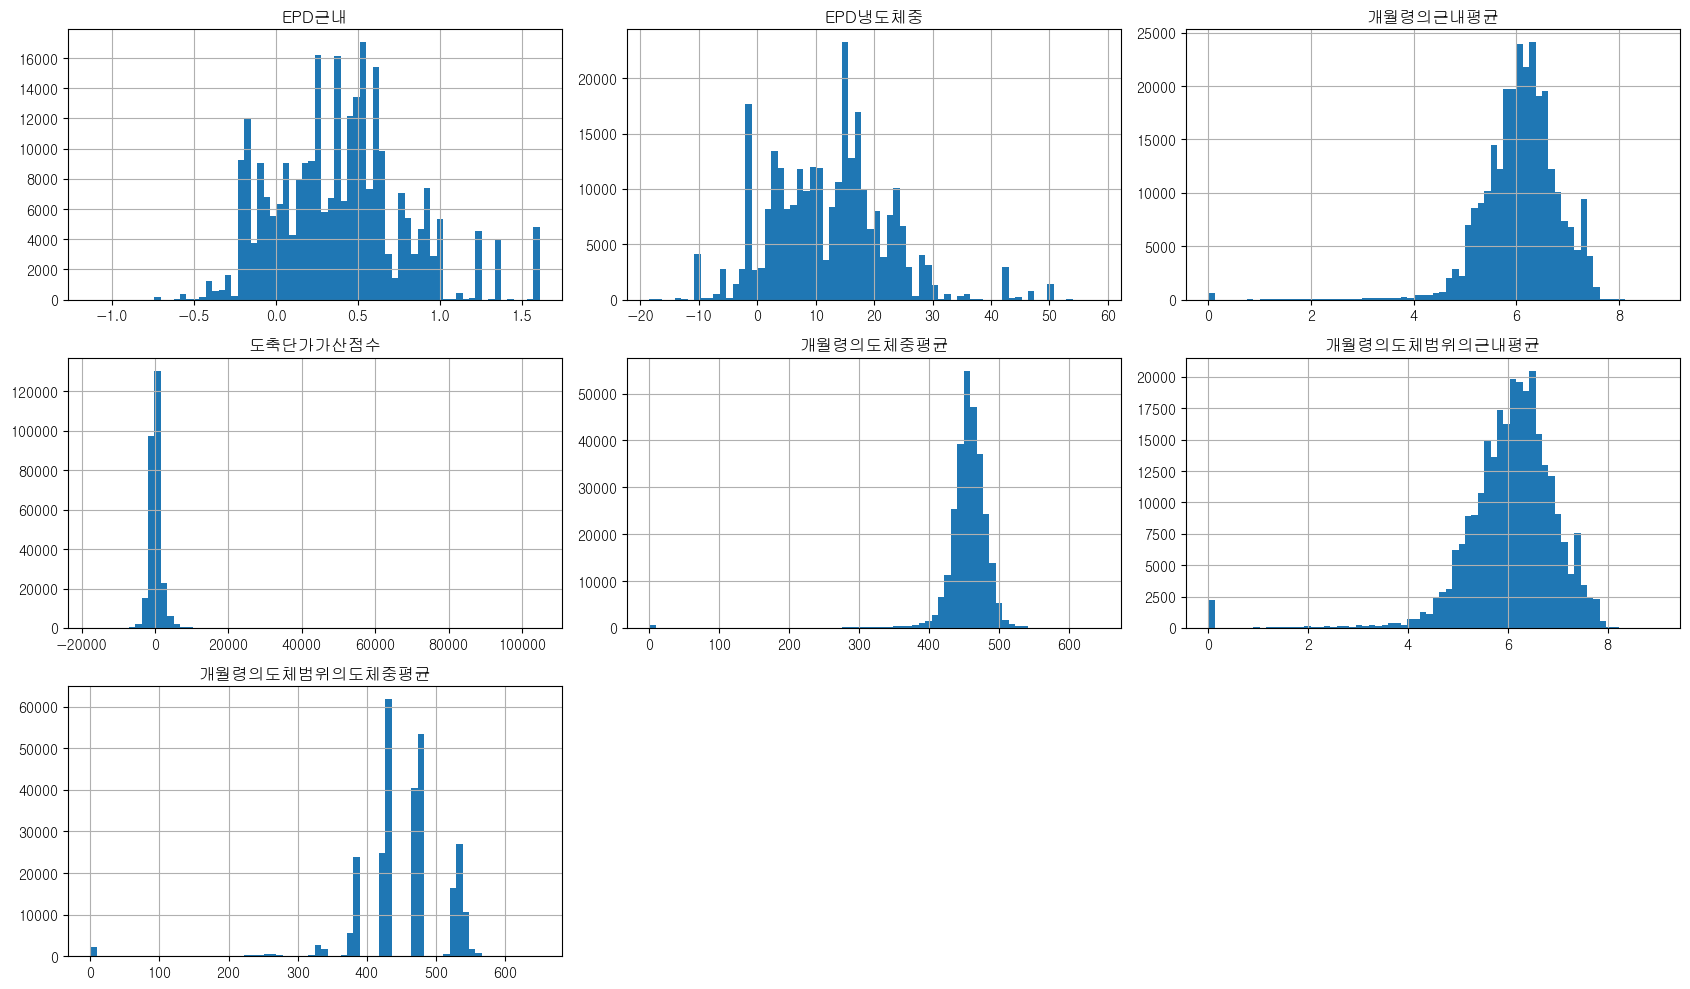

In [282]:
train_2[['EPD근내', 'EPD냉도체중', '개월령의근내평균', '도축단가가산점수', '개월령의도체중평균', '개월령의도체범위의근내평균',
            '개월령의도체범위의도체중평균']].hist(figsize=(17, 10), bins=70)
plt.tight_layout()
plt.show()

### target1

In [283]:
model2 = sm.Logit.from_formula(""" target1 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + C(형매_cat, Treatment(0)) + C(거세우_cat, Treatment(0)) + C(어미형매_cat,Treatment(0)) 
                              + C(외할미_cat,Treatment(0)) + C(농가근내_cat, Treatment(0)) 
                              + C(농가도체중_cat, Treatment(0)) + C(산차_binary, Treatment(0)) """, train_2).fit()

model2.summary()

Optimization terminated successfully.
         Current function value: 0.581935
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target1   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277479
Method:                           MLE   Df Model:                           23
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1140
Time:                        22:19:54   Log-Likelihood:            -1.6149e+05
converged:                       True   LL-Null:                   -1.8226e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -6.7912      0.257    -26.435      0.000      -7.295      -6.288
C(형매_cat, Treatment(0))[T.-1]       -0.3228      0.013    -25.169      0.000      -0.348      -0.298
C(형매_cat, Treatment(0))[T.1]         0.2664      0.012     21.466      0.000       0.242       0.291
C(거세우_cat, Treatment(0))[T.-1]      -0.0400      0.013     -3.078      0.002      -0.065      -0.015
C(거세우_cat, Treatment(0))[T.1]        0.0343      0.013      2.720      0.007       0.010       0.059
C(어미형매_cat, Treatment(0))[T.-1]     -0.1180      0.011    -10.430      0.000      -0.140      -0.096
C(어미형매_cat, Treatment(0))[T.1]       0.1627      0.011     14.606      0.000       0.141       0.185
C(외할미_cat, Treatment(0))[T.-1]      -0.0443      0.014     -3.244      0.001      -0.071      -0.018
C(외할미_cat, Treatment(0))[T.1]        0.0914      0.014      6.688      0.000       0.065       0.118
C(농가근내_cat, Treatment(0))[T.-1]     -0.3232      0.048     -6.777      0.000      -0.417      -0.230
C(농가근내_cat, Treatment(0))[T.1]       0.3016      0.048      6.342      0.000       0.208       0.395
C(농가도체중_cat, Treatment(0))[T.-1]    -0.0751      0.048     -1.575      0.115      -0.169       0.018
C(농가도체중_cat, Treatment(0))[T.1]     -0.0377      0.048     -0.789      0.430      -0.131       0.056
C(산차_binary, Treatment(0))[T.1]      0.2198      0.009     23.141      0.000       0.201       0.238
도축개월령                                0.0103      0.002      4.357      0.000       0.006       0.015
생시체중                                 0.0055   9.32e-05     58.995      0.000       0.005       0.006
EPD근내                               -0.0064      0.015     -0.415      0.678      -0.037       0.024
EPD냉도체중                              0.0041      0.001      6.446      0.000       0.003       0.005
KPN체고                                0.0010      0.002      0.450      0.653      -0.003       0.006
KPN체장                                0.0004      0.001      0.351      0.726      -0.002       0.003
개월령의근내평균                             0.3411      0.024     14.216      0.000       0.294       0.388
개월령의도체중평균                           -0.0042      0.000    -10.676      0.000      -0.005      -0.003
개월령의도체범위의근내평균                        0.7137      0.021     34.014      0.000       0.673       0.755
개월령의도체범위의도체중평균                      -0.0076      0.000    -27.756      0.000      -0.008      -0.007
====================================================================================================
"""

#### train_2, train 성능 보기

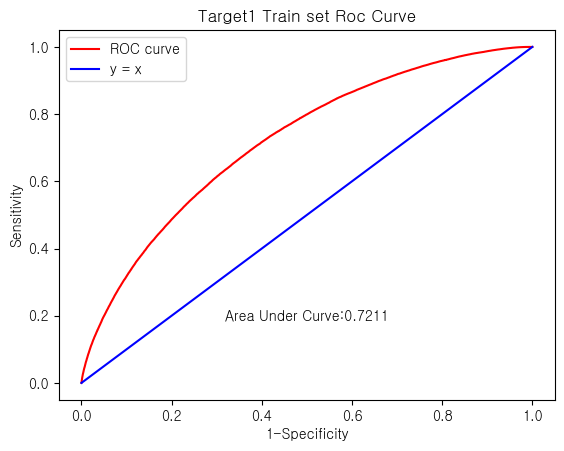

In [284]:
tr_pred2 = model2.predict(train_2)
tr_pred2

train_2['tr_pred2'] = tr_pred2

cal2 = train_2.copy()

cal2.dropna(subset=['tr_pred2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2['target1'], cal2['tr_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2['target1'], cal2['tr_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [285]:
cal2['prob_5'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2['prob_6'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2['prob_7'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2['prob_8'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2['prob_9'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2['prob_85'] = cal2['tr_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2[cal2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2[cal2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2[cal2['tr_pred2']>=0.5])}")
print(f"prob_5개수:{len(cal2[cal2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2[cal2['tr_pred2']>=0.6])}")
print(f"prob_6개수:{len(cal2[cal2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2[cal2['tr_pred2']>=0.7])}")
print(f"prob_7개수:{len(cal2[cal2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2[cal2['tr_pred2']>=0.8])}")
print(f"prob_8개수:{len(cal2[cal2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2[cal2['tr_pred2']>=0.9])}")
print(f"prob_9개수:{len(cal2[cal2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:101564
0.5이상개수:65456
prob_5개수:65456
0.6이상개수:32607
prob_6개수:32607
0.7이상개수:12752
prob_7개수:12752
0.8이상개수:2750
prob_8개수:2750
0.9이상개수:173
prob_9개수:173


#### confusion matirx, train_2

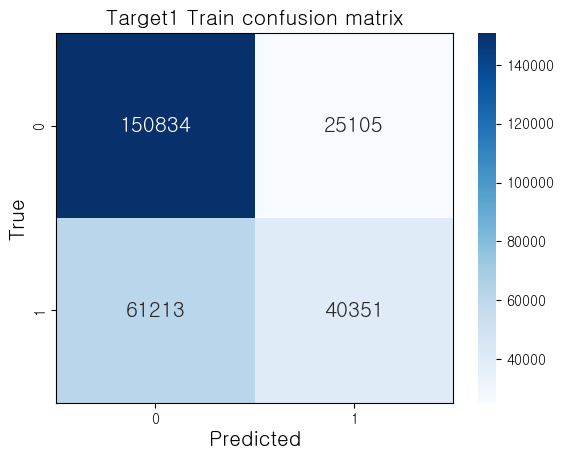

In [286]:
# cut-off 0.5
cm = confusion_matrix(cal2['target1'], cal2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [287]:
perfo(cal2['target1'], cal2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.3972962860856209,
 'Specificity': 0.8573084989683925,
 'Precision': 0.6164599120019555,
 'Accuracy': 0.6889475068737996,
 'F-beta Score': 0.4831876421985391}

#### train_2, test 성능 보기

In [288]:
data4['출생산차'].unique()
val = data4[(data4['출생산차']!=1141)|(data4['출생산차']!=1116)].copy()

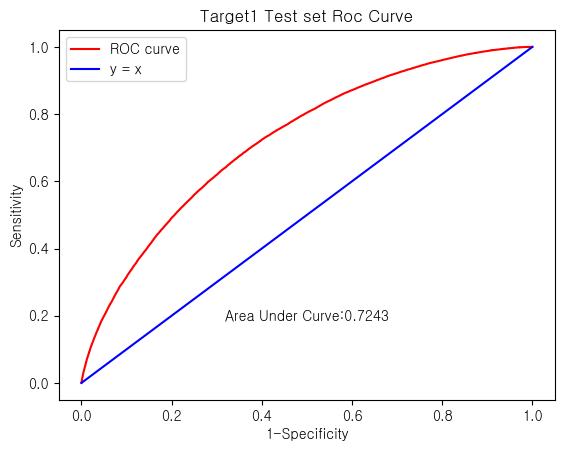

In [289]:
val_pred2 = model2.predict(val)
val_copy2 = val.copy()
val_copy2['val_pred2'] = val_pred2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2['target1'], val_copy2['val_pred2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2['target1'], val_copy2['val_pred2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target1 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [290]:
val_copy2['prob_5'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2['prob_6'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2['prob_7'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2['prob_8'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2['prob_9'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2['prob_85'] = val_copy2['val_pred2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2[val_copy2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(val_copy2[val_copy2['target1']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2[val_copy2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2[val_copy2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2[val_copy2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2[val_copy2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2[val_copy2['val_pred2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2[val_copy2['prob_9']==1])}")

5이상개수:51805
TARGET1개수:51805
0.5이상개수:39308
prob_5개수:39308
0.6이상개수:20951
prob_6개수:20951
0.7이상개수:8354
prob_7개수:8354
0.8이상개수:2071
prob_8개수:2071
0.9이상개수:164
prob_9개수:164


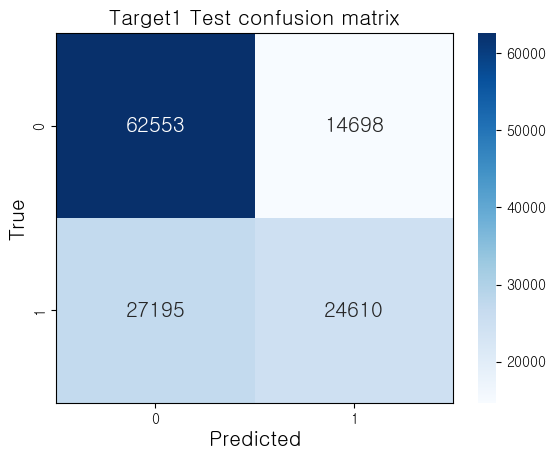

In [291]:
# cut-off 0.5
cm = confusion_matrix(val_copy2['target1'], val_copy2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target1 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [292]:
print(perfo(val_copy2['target1'], val_copy2['prob_5'], beta=1))
print(perfo(val_copy2['target1'], val_copy2['prob_6'], beta=1))
print(perfo(val_copy2['target1'], val_copy2['prob_7'], beta=1))
print(perfo(val_copy2['target1'], val_copy2['prob_8'], beta=1))
print(perfo(val_copy2['target1'], val_copy2['prob_9'], beta=1))

{'Sensitivity (Recall)': 0.4750506707846733, 'Specificity': 0.8097370907819964, 'Precision': 0.6260812048437977, 'Accuracy': 0.6753889784279693, 'F-beta Score': 0.5402083127544917}
{'Sensitivity (Recall)': 0.2809574365408744, 'Specificity': 0.9172049552756598, 'Precision': 0.6947162426614482, 'Accuracy': 0.6618057277460947, 'F-beta Score': 0.4001044587387981}
{'Sensitivity (Recall)': 0.12321204516938519, 'Specificity': 0.974485767174535, 'Precision': 0.7640651185061048, 'Accuracy': 0.6327718199851228, 'F-beta Score': 0.21220432520487373}
{'Sensitivity (Recall)': 0.03295048740469067, 'Specificity': 0.9952880868856067, 'Precision': 0.8242394978271367, 'Accuracy': 0.6089914455740144, 'F-beta Score': 0.06336773331353479}
{'Sensitivity (Recall)': 0.0027603513174404015, 'Specificity': 0.999728158858785, 'Precision': 0.8719512195121951, 'Accuracy': 0.5995304363997025, 'F-beta Score': 0.005503280802016587}


In [293]:
val_copy2.to_csv('../result/category.csv', index=False, encoding='cp949')

### target2

In [294]:
model2_target2 = sm.Logit.from_formula(""" target2 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + C(형매_cat, Treatment(0)) + C(거세우_cat, Treatment(0)) + C(어미형매_cat,Treatment(0)) 
                              + C(외할미_cat,Treatment(0)) + C(농가근내_cat, Treatment(0)) 
                              + C(농가도체중_cat, Treatment(0)) + C(산차_binary, Treatment(0))""", train_2).fit()

model2_target2.summary()

Optimization terminated successfully.
         Current function value: 0.552193
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target2   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277479
Method:                           MLE   Df Model:                           23
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1221
Time:                        22:20:19   Log-Likelihood:            -1.5324e+05
converged:                       True   LL-Null:                   -1.7455e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -5.3684      0.245    -21.877      0.000      -5.849      -4.887
C(형매_cat, Treatment(0))[T.-1]       -0.2846      0.013    -22.318      0.000      -0.310      -0.260
C(형매_cat, Treatment(0))[T.1]         0.3039      0.013     22.980      0.000       0.278       0.330
C(거세우_cat, Treatment(0))[T.-1]      -0.0240      0.013     -1.810      0.070      -0.050       0.002
C(거세우_cat, Treatment(0))[T.1]        0.0300      0.013      2.297      0.022       0.004       0.056
C(어미형매_cat, Treatment(0))[T.-1]     -0.1013      0.011     -8.870      0.000      -0.124      -0.079
C(어미형매_cat, Treatment(0))[T.1]       0.1729      0.012     14.375      0.000       0.149       0.196
C(외할미_cat, Treatment(0))[T.-1]      -0.0248      0.014     -1.762      0.078      -0.052       0.003
C(외할미_cat, Treatment(0))[T.1]        0.1035      0.015      7.051      0.000       0.075       0.132
C(농가근내_cat, Treatment(0))[T.-1]     -0.2499      0.048     -5.171      0.000      -0.345      -0.155
C(농가근내_cat, Treatment(0))[T.1]       0.3395      0.048      7.007      0.000       0.245       0.435
C(농가도체중_cat, Treatment(0))[T.-1]    -0.1125      0.048     -2.321      0.020      -0.208      -0.017
C(농가도체중_cat, Treatment(0))[T.1]     -0.0553      0.049     -1.139      0.255      -0.151       0.040
C(산차_binary, Treatment(0))[T.1]      0.2431      0.010     24.381      0.000       0.224       0.263
도축개월령                                0.0023      0.002      1.003      0.316      -0.002       0.007
생시체중                                 0.0061   8.89e-05     68.422      0.000       0.006       0.006
EPD근내                               -0.0463      0.016     -2.854      0.004      -0.078      -0.015
EPD냉도체중                              0.0022      0.001      3.437      0.001       0.001       0.003
KPN체고                               -0.0001      0.002     -0.063      0.950      -0.005       0.004
KPN체장                                0.0008      0.001      0.718      0.473      -0.001       0.003
개월령의근내평균                             0.3006      0.022     13.613      0.000       0.257       0.344
개월령의도체중평균                           -0.0032      0.000     -9.104      0.000      -0.004      -0.003
개월령의도체범위의근내평균                        0.7674      0.019     40.596      0.000       0.730       0.804
개월령의도체범위의도체중평균                      -0.0088      0.000    -34.771      0.000      -0.009      -0.008
====================================================================================================
"""

#### train_2, train 성능 보기

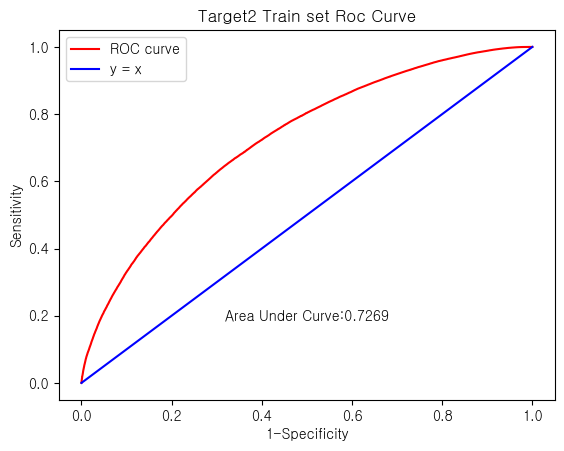

In [295]:
tr_pred2_target2 = model2_target2.predict(train_2)
tr_pred2_target2

train_2['tr_pred2_target2'] = tr_pred2_target2

cal2_target2 = train_2.copy()

cal2_target2.dropna(subset=['tr_pred2_target2'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target2['target2'], cal2_target2['tr_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [296]:
cal2_target2['prob_5'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target2['prob_6'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target2['prob_7'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target2['prob_8'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target2['prob_9'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target2['prob_85'] = cal2_target2['tr_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target2[cal2_target2['근내환산점수']==5])}")
print(f"TARGET1개수:{len(cal2_target2[cal2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(cal2_target2[cal2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(cal2_target2[cal2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(cal2_target2[cal2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(cal2_target2[cal2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target2[cal2_target2['tr_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(cal2_target2[cal2_target2['prob_9']==1])}")

5이상개수:101564
TARGET1개수:187915
0.5이상개수:232076
prob_5개수:232076
0.6이상개수:196413
prob_6개수:196413
0.7이상개수:144887
prob_7개수:144887
0.8이상개수:79173
prob_8개수:79173
0.9이상개수:18811
prob_9개수:18811


#### confusion matirx, train_2

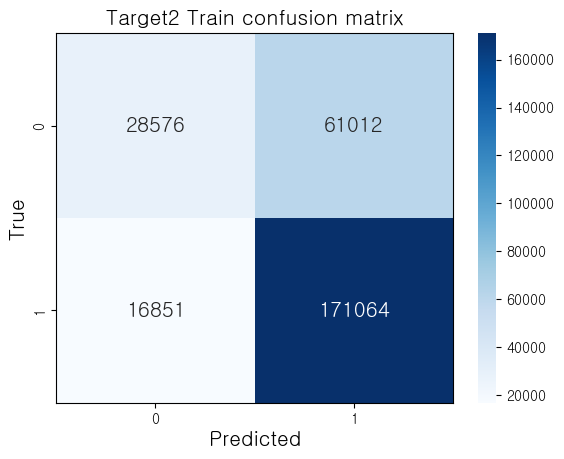

In [297]:
# cut-off 0.5
cm = confusion_matrix(cal2_target2['target2'], cal2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [298]:
perfo(cal2_target2['target2'], cal2_target2['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9103264773966954,
 'Specificity': 0.31897129079787473,
 'Precision': 0.7371033626915321,
 'Accuracy': 0.7194156459569806,
 'F-beta Score': 0.8146079320747349}

#### train_2, test 성능 보기

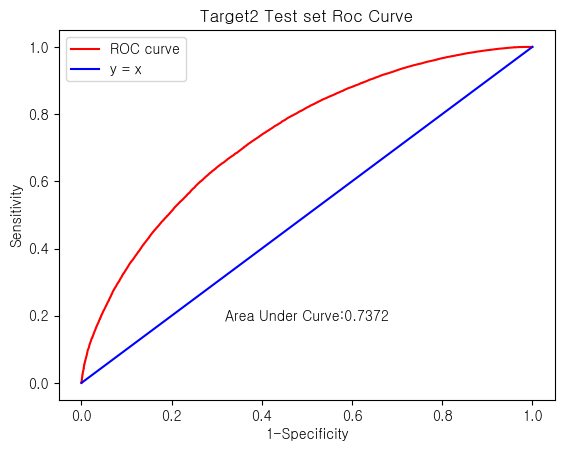

In [299]:
val_pred2_target2 = model2_target2.predict(val)
val_copy2_target2 = val.copy()
val_copy2_target2['val_pred2_target2'] = val_pred2_target2

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target2['target2'], val_copy2_target2['val_pred2_target2'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target2 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [300]:
val_copy2_target2['prob_5'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target2['prob_6'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target2['prob_7'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target2['prob_8'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target2['prob_9'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target2['prob_85'] = val_copy2_target2['val_pred2_target2'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target2[val_copy2_target2['근내환산점수']>=4])}")
print(f"TARGET2개수:{len(val_copy2_target2[val_copy2_target2['target2']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target2[val_copy2_target2['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target2[val_copy2_target2['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target2[val_copy2_target2['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target2[val_copy2_target2['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target2[val_copy2_target2['val_pred2_target2']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target2[val_copy2_target2['prob_9']==1])}")

5이상개수:90616
TARGET2개수:90616
0.5이상개수:112159
prob_5개수:112159
0.6이상개수:98699
prob_6개수:98699
0.7이상개수:77087
prob_7개수:77087
0.8이상개수:45794
prob_8개수:45794
0.9이상개수:11837
prob_9개수:11837


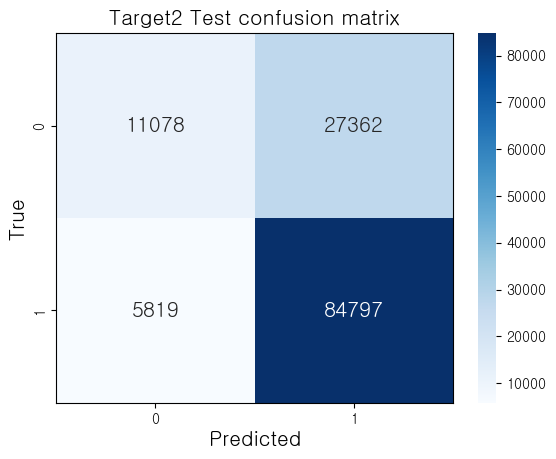

In [301]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target2['target2'], val_copy2_target2['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target2 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [302]:
print(perfo(val_copy2_target2['target2'], val_copy2_target2['prob_5'], beta=1))
print(perfo(val_copy2_target2['target2'], val_copy2_target2['prob_6'], beta=1))
print(perfo(val_copy2_target2['target2'], val_copy2_target2['prob_7'], beta=1))
print(perfo(val_copy2_target2['target2'], val_copy2_target2['prob_8'], beta=1))
print(perfo(val_copy2_target2['target2'], val_copy2_target2['prob_9'], beta=1))

{'Sensitivity (Recall)': 0.9357839675112563, 'Specificity': 0.2881893860561915, 'Precision': 0.7560427607236155, 'Accuracy': 0.7428945574014382, 'F-beta Score': 0.83636542966342}
{'Sensitivity (Recall)': 0.8543193255054295, 'Specificity': 0.44630593132154006, 'Precision': 0.7843544514128816, 'Accuracy': 0.7327904165633523, 'F-beta Score': 0.817843277077886}
{'Sensitivity (Recall)': 0.6987618080692152, 'Specificity': 0.6418314255983351, 'Precision': 0.8213966038372229, 'Accuracy': 0.6818047979171833, 'F-beta Score': 0.7551325855828458}
{'Sensitivity (Recall)': 0.4401871634148495, 'Specificity': 0.8463579604578564, 'Precision': 0.8710311394505831, 'Accuracy': 0.5611672452268782, 'F-beta Score': 0.5848251594457885}
{'Sensitivity (Recall)': 0.12211971395779994, 'Specificity': 0.979942767950052, 'Precision': 0.934865253020191, 'Accuracy': 0.37762676667493184, 'F-beta Score': 0.2160210047533991}


In [303]:
val_copy2_target2.to_csv('../result/category2.csv', encoding='cp949', index=False)

### target3

In [304]:
model2_target3 = sm.Logit.from_formula(""" target3 ~ 도축개월령+ 생시체중+ EPD근내+ EPD냉도체중+ KPN체고+ KPN체장
                              + 개월령의근내평균 + 개월령의도체중평균
                              + 개월령의도체범위의근내평균 + 개월령의도체범위의도체중평균
                              + C(형매_cat, Treatment(0)) + C(거세우_cat, Treatment(0)) + C(어미형매_cat,Treatment(0)) 
                              + C(외할미_cat,Treatment(0)) + C(농가근내_cat, Treatment(0)) 
                              + C(농가도체중_cat, Treatment(0)) + C(산차_binary, Treatment(0)) """, train_2).fit()

model2_target3.summary()

Optimization terminated successfully.
         Current function value: 0.266216
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                target3   No. Observations:               277503
Model:                          Logit   Df Residuals:                   277479
Method:                           MLE   Df Model:                           23
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.1725
Time:                        22:20:46   Log-Likelihood:                -73876.
converged:                       True   LL-Null:                       -89276.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -4.7988      0.369    -13.014      0.000      -5.521      -4.076
C(형매_cat, Treatment(0))[T.-1]       -0.2879      0.020    -14.726      0.000      -0.326      -0.250
C(형매_cat, Treatment(0))[T.1]         0.3214      0.022     14.936      0.000       0.279       0.364
C(거세우_cat, Treatment(0))[T.-1]      -0.0157      0.021     -0.758      0.448      -0.056       0.025
C(거세우_cat, Treatment(0))[T.1]        0.0488      0.021      2.376      0.018       0.009       0.089
C(어미형매_cat, Treatment(0))[T.-1]     -0.0835      0.018     -4.700      0.000      -0.118      -0.049
C(어미형매_cat, Treatment(0))[T.1]       0.1996      0.020     10.093      0.000       0.161       0.238
C(외할미_cat, Treatment(0))[T.-1]      -0.0031      0.022     -0.138      0.891      -0.047       0.041
C(외할미_cat, Treatment(0))[T.1]        0.1153      0.024      4.815      0.000       0.068       0.162
C(농가근내_cat, Treatment(0))[T.-1]     -0.3292      0.077     -4.299      0.000      -0.479      -0.179
C(농가근내_cat, Treatment(0))[T.1]       0.2602      0.077      3.376      0.001       0.109       0.411
C(농가도체중_cat, Treatment(0))[T.-1]    -0.0859      0.077     -1.117      0.264      -0.237       0.065
C(농가도체중_cat, Treatment(0))[T.1]      0.0101      0.077      0.130      0.896      -0.141       0.161
C(산차_binary, Treatment(0))[T.1]      0.2877      0.016     18.000      0.000       0.256       0.319
도축개월령                               -0.0047      0.003     -1.474      0.140      -0.011       0.002
생시체중                                 0.0079      0.000     66.435      0.000       0.008       0.008
EPD근내                               -0.0841      0.025     -3.340      0.001      -0.134      -0.035
EPD냉도체중                              0.0005      0.001      0.482      0.630      -0.001       0.002
KPN체고                               -0.0065      0.003     -1.872      0.061      -0.013       0.000
KPN체장                                0.0032      0.002      1.824      0.068      -0.000       0.007
개월령의근내평균                             0.2600      0.028      9.152      0.000       0.204       0.316
개월령의도체중평균                           -0.0019      0.000     -4.375      0.000      -0.003      -0.001
개월령의도체범위의근내평균                        0.9319      0.023     39.834      0.000       0.886       0.978
개월령의도체범위의도체중평균                      -0.0109      0.000    -33.770      0.000      -0.011      -0.010
====================================================================================================
"""

#### train_2, train 성능 보기

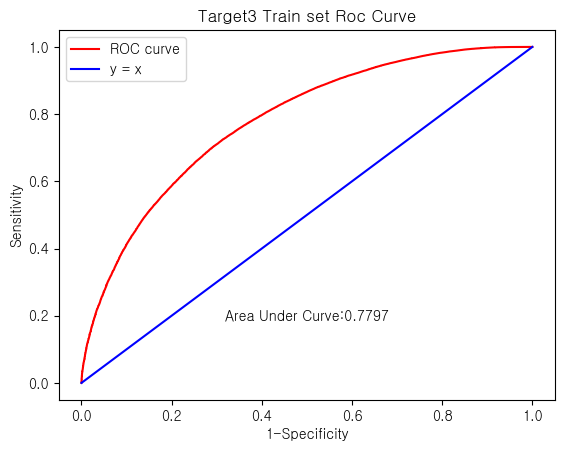

In [305]:
tr_pred2_target3 = model2_target3.predict(train_2)
tr_pred2_target3

train_2['tr_pred2_target3'] = tr_pred2_target3

cal2_target3 = train_2.copy()

cal2_target3.dropna(subset=['tr_pred2_target3'], inplace=True)

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(cal2_target3['target3'], cal2_target3['tr_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Train set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [306]:
cal2_target3['prob_5'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
cal2_target3['prob_6'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
cal2_target3['prob_7'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
cal2_target3['prob_8'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
cal2_target3['prob_9'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

cal2_target3['prob_85'] = cal2_target3['tr_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(cal2_target3[cal2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(cal2_target3[cal2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(cal2_target3[cal2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(cal2_target3[cal2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(cal2_target3[cal2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(cal2_target3[cal2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(cal2_target3[cal2_target3['tr_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(cal2_target3[cal2_target3['prob_9']==1])}")

5이상개수:250177
TARGET1개수:250177
0.5이상개수:272687
prob_5개수:272687
0.6이상개수:270094
prob_6개수:270094
0.7이상개수:263937
prob_7개수:263937
0.8이상개수:247024
prob_8개수:247024
0.9이상개수:191842
prob_9개수:191842


#### confusion matirx, train_2

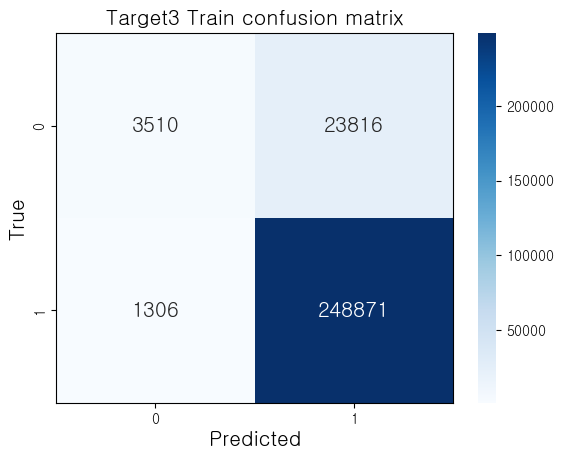

In [307]:
# cut-off 0.5
cm = confusion_matrix(cal2_target3['target3'], cal2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Train confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [308]:
perfo(cal2_target3['target3'], cal2_target3['prob_5'], beta=1)

{'Sensitivity (Recall)': 0.9947796959752495,
 'Specificity': 0.12844909609895339,
 'Precision': 0.9126617697213288,
 'Accuracy': 0.9094712489594707,
 'F-beta Score': 0.9519530891398146}

#### train_2, test 성능 보기

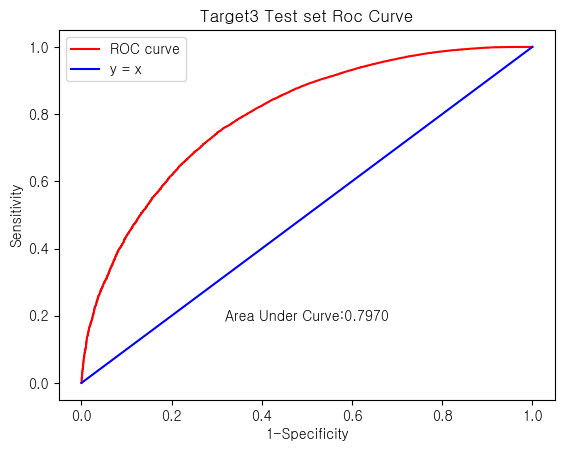

In [309]:
val_pred2_target3 = model2_target3.predict(val)
val_copy2_target3 = val.copy()
val_copy2_target3['val_pred2_target3'] = val_pred2_target3

# roc curve, auc train set
fpr, tpr, thresholds = roc_curve(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])

# auc 계산

plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

auc = roc_auc_score(val_copy2_target3['target3'], val_copy2_target3['val_pred2_target3'])
plt.text(0.5, 0.2, f"Area Under Curve:{auc:.4f}", ha='center', va='center', fontsize=10)
plt.title('Target3 Test set Roc Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.legend() # 그래프 라벨 표시

plt.show()

In [310]:
val_copy2_target3['prob_5'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.5<= x else 0 if 0<x<5 else x)
val_copy2_target3['prob_6'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.6<= x else 0 if 0<x<6 else x)
val_copy2_target3['prob_7'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.7<= x else 0 if 0<x<7 else x)
val_copy2_target3['prob_8'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.8<= x else 0 if 0<x<8 else x)
val_copy2_target3['prob_9'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.9<= x else 0 if 0<x<9 else x)

val_copy2_target3['prob_85'] = val_copy2_target3['val_pred2_target3'].apply(lambda x: 1 if 0.85<= x else 0 if 0<x<85 else x)


print(f"5이상개수:{len(val_copy2_target3[val_copy2_target3['근내환산점수']>=3])}")
print(f"TARGET1개수:{len(val_copy2_target3[val_copy2_target3['target3']==1])}")
print('========================================='*2)
print(f"0.5이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.5])}")
print(f"prob_5개수:{len(val_copy2_target3[val_copy2_target3['prob_5']==1])}")
print('========================================='*2)
print(f"0.6이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.6])}")
print(f"prob_6개수:{len(val_copy2_target3[val_copy2_target3['prob_6']==1])}")
print('========================================='*2)
print(f"0.7이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.7])}")
print(f"prob_7개수:{len(val_copy2_target3[val_copy2_target3['prob_7']==1])}")
print('========================================='*2)
print(f"0.8이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.8])}")
print(f"prob_8개수:{len(val_copy2_target3[val_copy2_target3['prob_8']==1])}")
print('========================================='*2)
print(f"0.9이상개수:{len(val_copy2_target3[val_copy2_target3['val_pred2_target3']>=0.9])}")
print(f"prob_9개수:{len(val_copy2_target3[val_copy2_target3['prob_9']==1])}")

5이상개수:118300
TARGET1개수:118300
0.5이상개수:126875
prob_5개수:126875
0.6이상개수:125688
prob_6개수:125688
0.7이상개수:123373
prob_7개수:123373
0.8이상개수:117475
prob_8개수:117475
0.9이상개수:96830
prob_9개수:96830


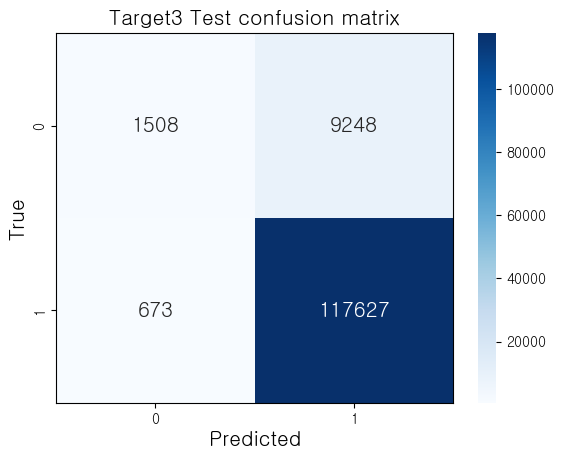

In [311]:
# cut-off 0.5
cm = confusion_matrix(val_copy2_target3['target3'], val_copy2_target3['prob_5'])

# Plot the confusion matrix with specific formatting for annotations
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Accessing the text elements of the heatmap and setting font properties
for _, spine in heatmap.spines.items():
    spine.set_visible(True)

for t in heatmap.texts:
    t.set_fontsize(15)  # Set the font size here

plt.title('Target3 Test confusion matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

In [312]:
print(perfo(val_copy2_target3['target3'], val_copy2_target3['prob_5'], beta=1))
print(perfo(val_copy2_target3['target3'], val_copy2_target3['prob_6'], beta=1))
print(perfo(val_copy2_target3['target3'], val_copy2_target3['prob_7'], beta=1))
print(perfo(val_copy2_target3['target3'], val_copy2_target3['prob_8'], beta=1))
print(perfo(val_copy2_target3['target3'], val_copy2_target3['prob_9'], beta=1))

{'Sensitivity (Recall)': 0.9943110735418428, 'Specificity': 0.14020081814801041, 'Precision': 0.9271093596059113, 'Accuracy': 0.9231263947433672, 'F-beta Score': 0.9595350260018355}
{'Sensitivity (Recall)': 0.9885883347421809, 'Specificity': 0.18761621420602453, 'Precision': 0.9304786455349755, 'Accuracy': 0.9218323828415571, 'F-beta Score': 0.9586537042805384}
{'Sensitivity (Recall)': 0.9754015215553677, 'Specificity': 0.25780959464484937, 'Precision': 0.9352937838911269, 'Accuracy': 0.9155947805603769, 'F-beta Score': 0.9549266984727296}
{'Sensitivity (Recall)': 0.9372020287404903, 'Specificity': 0.3860171067311268, 'Precision': 0.9437837837837838, 'Accuracy': 0.8912642573766427, 'F-beta Score': 0.9404813911568234}
{'Sensitivity (Recall)': 0.7867371090448013, 'Specificity': 0.65052063964299, 'Precision': 0.961179386553754, 'Accuracy': 0.7753843292834118, 'F-beta Score': 0.865253567610282}


In [313]:
val_copy2_target3.to_csv('../result/category3.csv', encoding='cp949', index=False)